In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from glob import glob

In [2]:
all_shop = glob('./과제data/소상공인*.csv')
import cartogram.fillter1 as ft

In [3]:
c_d = ft.fillter(all_shop)

In [4]:
c_p = pd.DataFrame(c_d)

In [5]:
c_p.rename({0:'ID', 1:'커피빈', 2: '스타벅스', 3:'이디야', 4:'빽다방'},axis=1 ,inplace=True)

In [6]:
c_p['커피지수'] = (c_p['커피빈'] + c_p['스타벅스']) / (c_p['이디야']) + (c_p['빽다방'])

In [7]:
# 0으로 나눈것들 때문에 무한대가 생김
c_p[c_p['커피지수'] == np.inf]

,ID,커피빈,스타벅스,이디야,빽다방,커피지수
68,하동,0,1,0,0,inf
102,영양,0,1,0,0,inf
224,금산,1,0,0,0,inf
233,청양,0,1,0,0,inf


In [8]:
# 0으로 바꾸기
c_p.replace([np.inf], 0,inplace=True)

In [9]:
# nan값 0으로 바꾸기
c_p = c_p.fillna(0)

### 카토그램

In [10]:
draw_korea_raw = pd.read_excel('./과제data/draw_korea_raw(수정).xlsx')
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0' : 'y', 'level_1' : 'x', 0: 'ID'}, inplace=True)
draw_korea = draw_korea_raw_stacked
draw_korea.loc[draw_korea['ID'] == '인천 남구', 'ID'] = '인천 미추홀'

In [11]:
c_p = pd.merge(c_p, draw_korea, how='left', on=['ID'])
c_p.head()

,ID,커피빈,스타벅스,이디야,빽다방,커피지수,y,x
0,강릉,0,5,15,2,2.333333,3,11
1,정선,0,0,2,0,0.000000,3,10
2,원주,1,10,11,5,6.000000,5,10
3,영월,0,0,0,0,0.000000,7,10
4,태백,0,1,1,0,1.000000,4,10


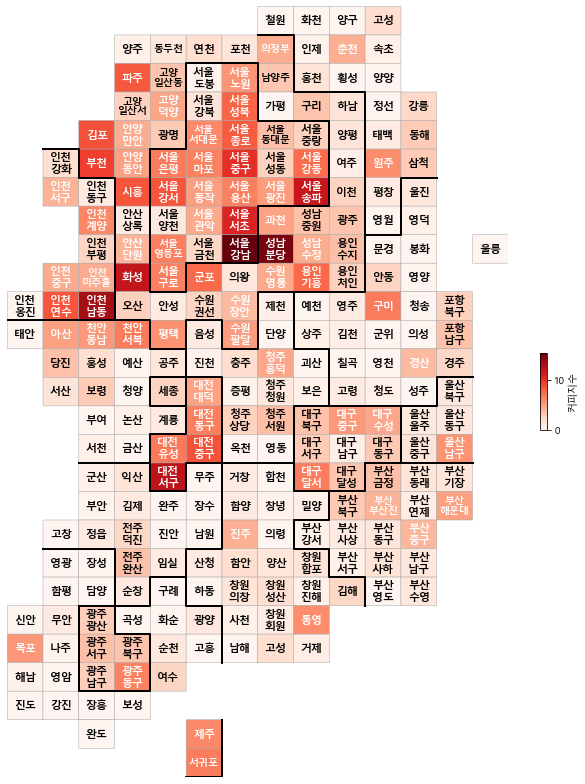

In [12]:
import cartogram.drawkorea as dk
dk.drawKorea('커피지수', c_p, 'Reds')

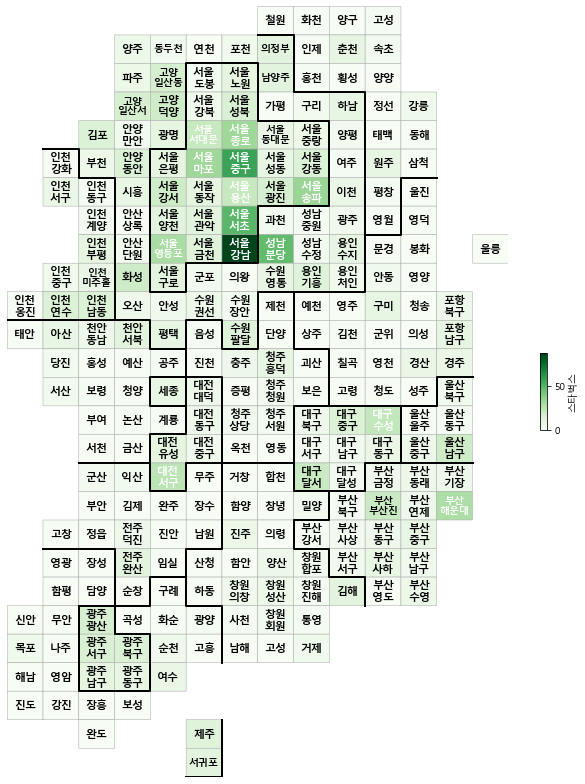

In [13]:
#스타벅스 매장수
dk.drawKorea('스타벅스', c_p, 'Greens')

### 지도에 나타내기

In [14]:
c_p_folium = c_p.set_index('ID')
c_p_folium.head()

,커피빈,스타벅스,이디야,빽다방,커피지수,y,x
ID,,,,,,,
강릉,0,5,15,2,2.333333,3,11
정선,0,0,2,0,0.000000,3,10
원주,1,10,11,5,6.000000,5,10
영월,0,0,0,0,0.000000,7,10
태백,0,1,1,0,1.000000,4,10


In [15]:
geo_path = './과제data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,  
               data = c_p_folium['커피지수'],
               columns= [c_p_folium.index, c_p_folium['커피지수']],
               fill_color= 'YlGnBu',
               key_on='feature.id'
)
map